# Importação das Biblioecas

In [888]:
import pandas as pd
import seaborn as sns
import yfinance as yf
import sklearn as sk

# Importar os Dados

### Dados trimestrais

In [889]:
quarterly_reports = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, quarterly_reports.columns))
quarterly_reports = quarterly_reports.drop(columns=coluns_to_remove)
quarterly_reports[quarterly_reports.isna()] = 0
quarterly_reports.to_csv("./../assets/dados.csv")
ticker = pd.read_csv("./../assets/url.csv")['Nome'] + '11'
quarterly_reports['ticker'] = ticker
print(len(coluns_to_remove),coluns_to_remove)
quarterly_reports

1 ['Unnamed: 0']


,1.2.1 sum,1.2.1 mean,1.2.1 count,1.2.1 stdr,1.2.2 sum,1.2.2 mean,1.2.2 count,1.2.2 stdr,1.2.11 sum,1.2.11 mean,...,qualquer stdr,3.1.1 sum,3.1.1 mean,3.1.1 count,3.1.1 stdr,3.1.2 sum,3.1.2 mean,3.1.2 count,3.1.2 stdr,ticker
0,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
1,4475406.0,4475406.0,1.0,443065194.0,1.567401e+08,5.805189e+06,27.0,5.747137e+08,73738202.72,4.915880e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
2,4688049.6,4688049.6,1.0,464116910.4,1.532604e+08,6.966381e+06,22.0,6.897587e+08,76949517.70,5.496394e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
3,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
4,0.0,0.0,0.0,0.0,1.748127e+08,1.165418e+07,15.0,1.153764e+09,50223493.13,8.370582e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
229,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
230,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
231,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11


### Dados de Mudanças de preços

In [890]:
import os
quotes_path = '../assets/q'
all_quoters = os.listdir(quotes_path)
quote_df = pd.DataFrame()
print(all_quoters)
for quote in all_quoters:
    data = pd.read_csv(f"{quotes_path}/{quote}")[2:]
    data['ticker'] = quote[:6]
    data.columns = map(lambda column: 'Data' if(column == 'Price') else column, data.columns)
    quote_df = pd.concat([data,quote_df],axis='index')
quote_df

['AAZQ11.SA.csv', 'AGRX11.SA.csv', 'BBGO11.SA.csv', 'CPTR11.SA.csv', 'CRAA11.SA.csv', 'DCRA11.SA.csv', 'EGAF11.SA.csv', 'FGAA11.SA.csv', 'FLEM11.SA.csv', 'FZDB11.SA.csv', 'GCRA11.SA.csv', 'GRWA11.SA.csv', 'HGAG11.SA.csv', 'IAAG11.SA.csv', 'IAGR11.SA.csv', 'IFIX.csv', 'JGPX11.SA.csv', 'KNCA11.SA.csv', 'KOPA11.SA.csv', 'LSAG11.SA.csv', 'NCRA11.SA.csv', 'OIAG11.SA.csv', 'PLCA11.SA.csv', 'RURA11.SA.csv', 'RZAG11.SA.csv', 'RZEO11.SA.csv', 'SNAG11.SA.csv', 'VCRA11.SA.csv', 'VGIA11.SA.csv', 'XPCA11.SA.csv']


,Data,Close,High,Low,Open,Volume,ticker,Adj Close,Date
2,2021-11-19,6.492498874664307,7.141748762130737,4.86937415599823,7.141748762130737,129268,XPCA11,NaN,NaN
3,2021-11-22,6.492498874664307,6.492498874664307,5.51862404346466,5.817279016466136,57478,XPCA11,NaN,NaN
4,2021-11-23,6.258769512176514,6.4860066148683675,5.91466660544714,6.4860066148683675,31221,XPCA11,NaN,NaN
5,2021-11-24,5.973100662231445,6.388620939816629,5.6419829700544915,6.258771046562863,104533,XPCA11,NaN,NaN
6,2021-11-25,5.856234073638916,6.3626487944634045,5.680936313061447,6.148396388761778,81548,XPCA11,NaN,NaN
...,...,...,...,...,...,...,...,...,...
505,2024-12-26,6.429999828338623,6.570000171661377,6.28000020980835,6.400000095367432,74451,AAZQ11,NaN,NaN
506,2024-12-27,6.550000190734863,6.579999923706055,6.5,6.5,58698,AAZQ11,NaN,NaN
507,2024-12-30,6.860000133514404,6.889999866485596,6.480000019073486,6.599999904632568,116742,AAZQ11,NaN,NaN
508,2025-01-02,6.570000171661377,6.699999809265137,6.519999980926514,6.699999809265137,70990,AAZQ11,NaN,NaN


In [891]:
quote_df['Mount'] = quote_df['Data'].str[:7]
quote_df = quote_df.drop(columns=['Data','Adj Close','Volume'])
quote_df.groupby(['Mount','ticker']).corr()

Close      High       Low      Open  Date
Mount   ticker                                                    
2021-10 RZAG11 Close  1.000000  0.589710  0.784890  0.609676   NaN
               High   0.589710  1.000000  0.187623  0.839248   NaN
               Low    0.784890  0.187623  1.000000  0.359378   NaN
               Open   0.609676  0.839248  0.359378  1.000000   NaN
               Date        NaN       NaN       NaN       NaN   NaN
...                        ...       ...       ...       ...   ...
2025-01 XPCA11 Close  1.000000  1.000000  1.000000 -1.000000   NaN
               High   1.000000  1.000000  1.000000 -1.000000   NaN
               Low    1.000000  1.000000  1.000000 -1.000000   NaN
               Open  -1.000000 -1.000000 -1.000000  1.000000   NaN
               Date        NaN       NaN       NaN       NaN   NaN

[3650 rows x 5 columns]

In [892]:
quote_df.dtypes

Close     object
High      object
Low       object
Open      object
ticker    object
Date      object
Mount     object
dtype: object

In [893]:
for colum in quote_df.columns:
    if colum not in ['Mount','ticker','Date']:
        print(colum)
        quote_df[colum] = pd.to_numeric(quote_df[colum])

quote_df.dtypes

Close
High
Low
Open


Close     float64
High      float64
Low       float64
Open      float64
ticker     object
Date       object
Mount      object
dtype: object

In [894]:
variance= quote_df.groupby(['Mount','ticker'])['Open'].var()
variance

Mount    ticker
2021-10  RZAG11    0.008886
2021-11  JGPX11    0.024130
         RZAG11    0.026305
         XPCA11    0.207101
2021-12  JGPX11    1.871287
                     ...   
2025-01  RZAG11    0.018050
         SNAG11    0.031250
         VCRA11    0.105800
         VGIA11    0.012800
         XPCA11    0.004050
Name: Open, Length: 730, dtype: float64

In [895]:
quote_df.groupby(['Mount','ticker'])['Open'].mean().reset_index()['ticker'].unique()
quote_df.groupby(['Mount','ticker'])['Open'].mean().reset_index()

,Mount,ticker,Open
0,2021-10,RZAG11,6.207271
1,2021-11,JGPX11,62.138298
2,2021-11,RZAG11,6.025818
3,2021-11,XPCA11,6.184917
4,2021-12,JGPX11,61.379853
...,...,...,...
725,2025-01,RZAG11,7.865000
726,2025-01,SNAG11,9.135000
727,2025-01,VCRA11,61.270000
728,2025-01,VGIA11,8.210000


In [896]:
ifix = yf.download('XFIX11.SA',multi_level_index=False,)
ifix['Month'] = ifix.index.to_period('M')
# ifix.to_csv('./../assets/q/IFIX.csv')
ifix

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,Month
Date,,,,,,
2021-01-12,10.22,10.26,10.21,10.26,24927,2021-01
2021-01-13,10.21,10.53,10.20,10.25,52700,2021-01
2021-01-14,10.22,10.23,10.20,10.22,33118,2021-01
2021-01-15,10.23,10.24,10.20,10.22,28232,2021-01
2021-01-18,10.24,10.25,10.21,10.23,30654,2021-01
...,...,...,...,...,...,...
2025-03-31,11.73,11.80,11.68,11.80,11764,2025-03
2025-04-01,11.77,11.82,11.64,11.82,18713,2025-04
2025-04-02,11.70,11.82,11.67,11.82,10980,2025-04


In [897]:
ifix.groupby(['Month']).var()['Open']

Month
2021-01    0.000541
2021-02    0.001153
2021-03    0.008575
2021-04    0.001075
2021-05    0.000501
2021-06    0.023019
2021-07    0.014736
2021-08    0.020445
2021-09    0.006156
2021-10    0.018042
2021-11    0.026989
2021-12    0.076505
2022-01    0.004193
2022-02    0.040703
2022-03    0.003514
2022-04    0.004089
2022-05    0.003739
2022-06    0.001716
2022-07    0.003806
2022-08    0.038206
2022-09    0.003615
2022-10    0.001462
2022-11    0.043925
2022-12    0.022613
2023-01    0.005758
2023-02    0.003559
2023-03    0.007378
2023-04    0.009904
2023-05    0.039786
2023-06    0.018495
2023-07    0.001443
2023-08    0.002124
2023-09    0.002559
2023-10    0.002986
2023-11    0.004641
2023-12    0.021906
2024-01    0.002746
2024-02    0.000814
2024-03    0.002342
2024-04    0.006919
2024-05    0.003546
2024-06    0.012033
2024-07    0.013060
2024-08    0.005685
2024-09    0.013765
2024-10    0.022042
2024-11    0.010070
2024-12    0.076209
2025-01    0.045016
2025-02    0.0

### Dados mensais

In [898]:
mensal = pd.read_csv('./../assets/mes_data.csv')
rotulo = pd.DataFrame()
# mensal['Data da Informação sobre detalhamento do número de cotistas¹']
mensal['Data'] = pd.to_datetime(mensal['Data da Informação sobre detalhamento do número de cotistas¹'],dayfirst=True,errors='coerce')
mensal.drop(columns=['Data da Informação sobre detalhamento do número de cotistas¹'])

,Unnamed: 0,ticker,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30,2024.0-3.0
1,1,AAZQ,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30,2024.0-3.0
2,2,AAZQ,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31,2024.0-3.0
3,3,AAZQ,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28,2024.0-2.0
4,4,AAZQ,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31,2024.0-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29,2022.0-2.0
889,889,XPCA,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31,2022.0-1.0
890,890,XPCA,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25,2022.0-1.0
891,891,XPCA,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31,2022.0-1.0


# Fazer o rôtulo
Variação
Beta = Varição do ativo / Variação do indice
Rótulo = Beta * Variação * Resultado do próximo quarter(trimestre)

In [899]:
mensal['Ano_Quarter'] = mensal['Data'].dt.strftime('%Y') + '-' + mensal['Data'].dt.quarter.astype(str)
mensal['Ano_Quarter'] = mensal['Ano_Quarter'].str[:-2]
mensal['Ano_Quarter']


0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

### Remover colunas Unnamed de mensal e trmestral

In [900]:
mensal[mensal.isna()] = 0
mensal

C:\Users\Kire\AppData\Local\Temp\ipykernel_16524\3613130871.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mensal[mensal.isna()] = 0


,Unnamed: 0,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30 00:00:00,2024-3
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30 00:00:00,2024-3
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31 00:00:00,2024-3
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28 00:00:00,2024-2
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31 00:00:00,2024-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29 00:00:00,2022-2
889,889,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31 00:00:00,2022-1
890,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25 00:00:00,2022-1
891,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31 00:00:00,2022-1


In [901]:
mensal['Dividend Yield do Mês de Referência³ (%)']

0      1.0926
1      1.0933
2      1.0945
3      1.1660
4      1.1655
        ...  
888    1.4666
889    1.4620
890    1.1514
891    1.0461
892    0.8371
Name: Dividend Yield do Mês de Referência³ (%), Length: 893, dtype: float64

In [902]:
variance= variance.reset_index()
variance

,Mount,ticker,Open
0,2021-10,RZAG11,0.008886
1,2021-11,JGPX11,0.024130
2,2021-11,RZAG11,0.026305
3,2021-11,XPCA11,0.207101
4,2021-12,JGPX11,1.871287
...,...,...,...
725,2025-01,RZAG11,0.018050
726,2025-01,SNAG11,0.031250
727,2025-01,VCRA11,0.105800
728,2025-01,VGIA11,0.012800


In [903]:
variance.columns = ['data', 'ticker', 'variancia']
variance['data'] = pd.to_datetime(variance['data']).dt.to_period("M")
variance['data']

0      2021-10
1      2021-11
2      2021-11
3      2021-11
4      2021-12
        ...   
725    2025-01
726    2025-01
727    2025-01
728    2025-01
729    2025-01
Name: data, Length: 730, dtype: period[M]

In [904]:
# rotulo = pd.merge(rotulo,variance,'left',on=['ticker','data'])
rotulo = pd.concat([rotulo,variance])
rotulo

,data,ticker,variancia
0,2021-10,RZAG11,0.008886
1,2021-11,JGPX11,0.024130
2,2021-11,RZAG11,0.026305
3,2021-11,XPCA11,0.207101
4,2021-12,JGPX11,1.871287
...,...,...,...
725,2025-01,RZAG11,0.018050
726,2025-01,SNAG11,0.031250
727,2025-01,VCRA11,0.105800
728,2025-01,VGIA11,0.012800


### Pegar dados do indice

In [905]:
indice = yf.download(['XFIX11.SA'], start='2019-1-1',multi_level_index=False)['Open']
indice = indice.reset_index()
indice['Data'] = indice['Date'].dt.to_period('M')
indice = indice.groupby(by='Data')['Open'].var().reset_index()
indice.columns = ['data', 'Indice']
indice.head()

[*********************100%***********************]  1 of 1 completed


,data,Indice
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501


In [906]:
rotulo.columns

Index(['data', 'ticker', 'variancia'], dtype='object')

In [907]:
indice.columns

Index(['data', 'Indice'], dtype='object')

In [908]:
rotulo = pd.merge(rotulo,indice, on='data')
rotulo

,data,ticker,variancia,Indice
0,2021-10,RZAG11,0.008886,0.018042
1,2021-11,JGPX11,0.024130,0.026989
2,2021-11,RZAG11,0.026305,0.026989
3,2021-11,XPCA11,0.207101,0.026989
4,2021-12,JGPX11,1.871287,0.076505
...,...,...,...,...
725,2025-01,RZAG11,0.018050,0.045016
726,2025-01,SNAG11,0.031250,0.045016
727,2025-01,VCRA11,0.105800,0.045016
728,2025-01,VGIA11,0.012800,0.045016


In [909]:
rotulo['beta'] = rotulo['variancia'] / rotulo['Indice']

In [910]:
rotulo['label'] = rotulo['beta'] * rotulo['variancia']
rotulo

,data,ticker,variancia,Indice,beta,label
0,2021-10,RZAG11,0.008886,0.018042,0.492501,0.004376
1,2021-11,JGPX11,0.024130,0.026989,0.894052,0.021573
2,2021-11,RZAG11,0.026305,0.026989,0.974642,0.025638
3,2021-11,XPCA11,0.207101,0.026989,7.673378,1.589160
4,2021-12,JGPX11,1.871287,0.076505,24.459730,45.771165
...,...,...,...,...,...,...
725,2025-01,RZAG11,0.018050,0.045016,0.400972,0.007238
726,2025-01,SNAG11,0.031250,0.045016,0.694204,0.021694
727,2025-01,VCRA11,0.105800,0.045016,2.350287,0.248659
728,2025-01,VGIA11,0.012800,0.045016,0.284345,0.003640


In [911]:
without_label = rotulo.loc[rotulo['label'].isna()]
without_label.head()

,data,ticker,variancia,Indice,beta,label
36,2022-04,LSAG11,NaN,0.004089,NaN,NaN
677,2024-11,RZEO11,NaN,0.010070,NaN,NaN


por que estes fundos não estão com valor?

In [912]:
without_label['ticker'].unique()

array(['LSAG11', 'RZEO11'], dtype=object)

Será que é problema do yfinance?

In [913]:
yf.download('LSAG11.SA',multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2022-04-26,67.800819,67.800819,67.800819,67.800819,2224
2022-05-05,67.800819,67.800819,67.800819,67.800819,3998
2022-05-06,67.800819,67.800819,67.800819,67.800819,4284
2022-05-09,67.800819,67.800819,67.800819,67.800819,12378
2022-05-10,67.800819,67.800819,67.800819,67.800819,1904
...,...,...,...,...,...
2025-03-31,76.790001,78.724555,74.134920,74.134920,505
2025-04-01,74.889999,77.580002,73.669998,76.989998,990
2025-04-02,73.000000,75.860001,73.000000,75.639999,310


In [914]:
rotulo

,data,ticker,variancia,Indice,beta,label
0,2021-10,RZAG11,0.008886,0.018042,0.492501,0.004376
1,2021-11,JGPX11,0.024130,0.026989,0.894052,0.021573
2,2021-11,RZAG11,0.026305,0.026989,0.974642,0.025638
3,2021-11,XPCA11,0.207101,0.026989,7.673378,1.589160
4,2021-12,JGPX11,1.871287,0.076505,24.459730,45.771165
...,...,...,...,...,...,...
725,2025-01,RZAG11,0.018050,0.045016,0.400972,0.007238
726,2025-01,SNAG11,0.031250,0.045016,0.694204,0.021694
727,2025-01,VCRA11,0.105800,0.045016,2.350287,0.248659
728,2025-01,VGIA11,0.012800,0.045016,0.284345,0.003640


In [915]:
rotulo.describe()

,variancia,Indice,beta,label
count,728.000000,730.000000,7.280000e+02,7.280000e+02
mean,29.369360,0.014385,4.095211e+03,3.199129e+07
std,477.342127,0.017623,6.806205e+04,8.133023e+08
min,0.000000,0.000814,0.000000e+00,0.000000e+00
25%,0.006970,0.002986,9.899540e-01,6.028583e-03
50%,0.068570,0.006919,7.999784e+00,3.729322e-01
75%,0.584026,0.018495,8.363944e+01,5.492272e+01
max,12317.899726,0.076505,1.780175e+06,2.192801e+10


<Axes: xlabel='label', ylabel='Count'>

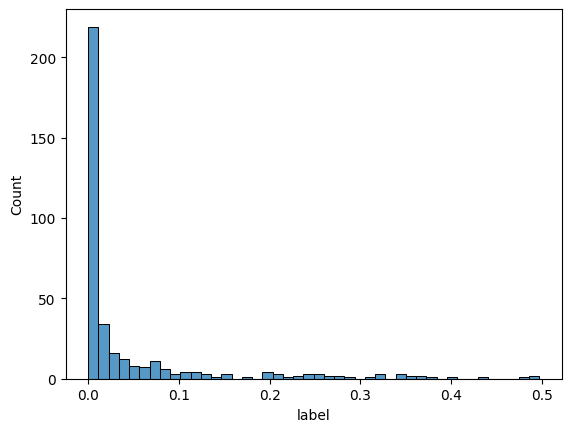

In [916]:
import matplotlib.pyplot as plt
label = rotulo['label']
sns.histplot(x=label.loc[(label<0.5) & (label>-0.5)],)
# plt.xlim(-1, 1)

<Axes: xlabel='label'>

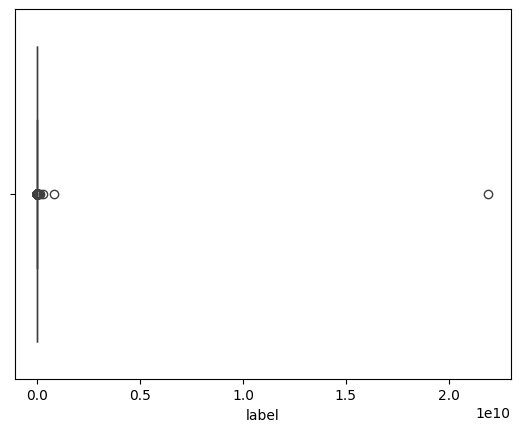

In [917]:
sns.boxplot(x=label)

In [918]:
# mensal.to_csv('../assets/mes_data.csv')
# for column in mensal.columns.tolist():
#     print(colum)
#     if colum not in ['Mount','Dividend Yield do Mês de Referência³ (%)']:
#         print(colum)
#         mensal[colum] = mensal[colum].astype(str).replace(".","").replace(',','.')
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [919]:
trimestre = pd.read_csv('../assets/dados1.csv')
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,8.653422e+09,-5.747045e+08,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.730684e+10,-1.730684e+09,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,8.653422e+10,-8.653422e+08,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.922983e+11,-1.922983e+08,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,7.430380e+09,-7.430380e+08,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [920]:
for i in trimestre.columns:
    print(i)

Unnamed: 0
NomedoFundo:
CNPJdoFundo:
DatadeFuncionamento:
PúblicoAlvo:
CódigoISIN:
Quantidadedecotasemitidas:
FundoExclusivo?
Cotistaspossuemvínculofamiliarousocietáriofamiliar?
Classificaçãoautorregulação:
PrazodeDuração:
DatadoPrazodeDuração:
Encerramentodoexercíciosocial:
Mercadodenegociaçãodascotas:
Entidadeadministradorademercadoorganizado:
NomedoAdministrador:
CNPJdoAdministrador:
Endereço:
Telefones:
Site:
E-mail:
Competência:
DatadeEncerramentodoTrimestre:
OFundoseenquadranadefiniçãodanota"6":
Resultadocontábil/financeirotrimestrallíquido_financeiro
Resultadocontábil/financeirotrimestrallíquido_contabil
(-)Taxadeadministração_financeiro
(-)Taxadeadministração_contabil
(-)Taxadedesempenho(performance)_financeiro
(-)Taxadedesempenho(performance)_contabil
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro
(-)Empresaespecializadadequetrata

In [921]:
# trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
# trimestre['DatadeFuncionamento:'] = pd.to_datetime(trimestre['DatadeFuncionamento:'])
# trimestre.to_csv('../assets/dados1.csv')


In [922]:
str(trimestre['NomedoFundo:'].unique().tolist())

"['AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO', 'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO', 'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO', 'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO', 'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO', '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB', 'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO', 'INTERAMERRA-FIA

In [923]:
dict_nome_ticker= {
    'AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'AAZQ', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO': 'AGRX', 
    'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO': 'BBGO', 
    'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO': 'CPTR', 
    'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'CRAA', 
    'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'DCRA', 
    'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'EGAF', 
    'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'FGAA', 
    '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO': 'FLEM', 
    '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB': 'FZDA', 
    'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'GCRA', 
    'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'GRWA', 
    'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO': 'HGAG', 
    'INTERAMERRA-FIAGRO-IMOBILIÁRIO': 'IAAG', 
    'SFIINVESTIMENTOSDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'IAGR', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISJGPCRÉDITO-FIAGRO-IMOBILIÁRIO': 'JGPX', 
    'KINEACRÉDITOAGROFIAGRO-IMOBILIÁRIO': 'KNCA', 
    'KINEAOPORTUNIDADESAGROIFIAGRO-IMOBILIÁRIO': 'KOPA', 
    'LESTEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'KOPA', 
    'NCHRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'NCHEQIRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'OURINVESTINNOVATION-FIAGROIMOBILIÁRIO': 'OIAG', 
    'PLURALBRBCRÉDITOAGRO-FIAGRO-IMOBILIÁRIO': 'PLCA', 
    'ITAÚASSETRURALFIAGRO-IMOBILIÁRIO': 'RURA', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISRIZAAGRO-FIAGRO-IMOBILIÁRIO': 'RZAG', 
    'RIZAEOSFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIÁRIO': 'RZEO', 
    'SUNOAGRO-FIAGRO-IMOBILIÁRIO': 'SNAG', 
    'VECTISDATAGROCRÉDITOAGRONEGÓCIO-FINASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'VCRA', 
    'VALORACRAFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'VGIA', 
    'XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISIMOB.-FIAGRO-IMOB.': 'XPCA'
}

In [924]:
trimestre['ticker'] = trimestre['NomedoFundo:'].apply(lambda x: dict_nome_ticker.get(x))
trimestre['ticker'] 

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
307    XPCA
308    XPCA
309    XPCA
310    XPCA
311    XPCA
Name: ticker, Length: 312, dtype: object

In [925]:
mensal.ticker

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
888    XPCA
889    XPCA
890    XPCA
891    XPCA
892    XPCA
Name: ticker, Length: 893, dtype: object

In [926]:
trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
trimestre['Ano_Quarter'] = trimestre['DatadeEncerramentodoTrimestre:'].dt.year.astype(str) + "-" + trimestre['DatadeEncerramentodoTrimestre:'].dt.quarter.astype(str) 
# mensal['Ano_Quarter']
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,ticker,Ano_Quarter
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,AAZQ,2024-2
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0,AAZQ,2024-1
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0,AAZQ,2023-4
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0,AAZQ,2023-3
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0,AAZQ,2023-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0,XPCA,2022-3
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,XPCA,2022-2
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1


In [927]:
trimestre['Ano_Quarter']

0      2024-2
1      2024-1
2      2023-4
3      2023-3
4      2023-2
        ...  
307    2022-3
308    2022-2
309    2022-1
310    2022-1
311    2021-4
Name: Ano_Quarter, Length: 312, dtype: object

In [928]:
mensal['Ano_Quarter']

0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

In [929]:
final = pd.merge(mensal,trimestre,'left',on=['Ano_Quarter','ticker'])

In [930]:
# final = final.drop(columns=['Unnamed: 0_y','Unnamed: 0_x','NaN'])

In [931]:
final.to_csv('../assets/final.csv')

In [932]:
final.shape

(1071, 207)

In [933]:
final[final.isna()] = 0

C:\Users\Kire\AppData\Local\Temp\ipykernel_16524\3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0


In [934]:
final

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1067,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1068,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1069,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [935]:
final.drop_duplicates(subset=['ticker','Data da Informação sobre detalhamento do número de cotistas¹'])

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,888,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0
1064,889,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1066,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1068,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [936]:
pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce').unique()

C:\Users\Kire\AppData\Local\Temp\ipykernel_16524\1663228034.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce').unique()


<DatetimeArray>
['2024-09-30 00:00:00', '2024-08-30 00:00:00', '2024-07-31 00:00:00',
 '2024-06-28 00:00:00', '2024-05-31 00:00:00', '2024-04-30 00:00:00',
 '2024-03-28 00:00:00', '2024-02-29 00:00:00', '2024-01-31 00:00:00',
 '2023-12-29 00:00:00', '2023-11-30 00:00:00', '2023-10-31 00:00:00',
 '2023-09-29 00:00:00', '2023-08-31 00:00:00', '2023-07-31 00:00:00',
 '2023-06-30 00:00:00', '2023-05-31 00:00:00', '2023-04-28 00:00:00',
 '2023-03-31 00:00:00', '2023-02-28 00:00:00', '2023-01-31 00:00:00',
 '2022-12-30 00:00:00', '2022-11-30 00:00:00', '2022-10-31 00:00:00',
 '2022-09-30 00:00:00', '2022-08-31 00:00:00', '2022-07-29 00:00:00',
 '2022-06-30 00:00:00', '2022-05-31 00:00:00', '2022-04-29 00:00:00',
 '2022-03-31 00:00:00', '2022-02-25 00:00:00', '2022-01-31 00:00:00',
 '2022-09-29 00:00:00', '2021-12-31 00:00:00',                 'NaT']
Length: 36, dtype: datetime64[ns]

Juntar final com label

In [937]:
rotulo.data

0      2021-10
1      2021-11
2      2021-11
3      2021-11
4      2021-12
        ...   
725    2025-01
726    2025-01
727    2025-01
728    2025-01
729    2025-01
Name: data, Length: 730, dtype: period[M]

In [938]:
final['data'] = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce').dt.to_period('M')
final['data']

C:\Users\Kire\AppData\Local\Temp\ipykernel_16524\1191665958.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final['data'] = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce').dt.to_period('M')


0       2024-09
1       2024-08
2       2024-07
3       2024-06
4       2024-05
         ...   
1066    2022-02
1067    2022-02
1068    2022-01
1069    2022-01
1070    2021-12
Name: data, Length: 1071, dtype: period[M]

In [939]:
rotulo =  rotulo.drop(columns=['variancia', 'Indice', 'beta'],)
rotulo.columns

Index(['data', 'ticker', 'label'], dtype='object')

In [940]:
rotulo['ticker'].unique()

array(['RZAG11', 'JGPX11', 'XPCA11', 'VGIA11', 'EGAF11', 'KNCA11',
       'BBGO11', 'DCRA11', 'RURA11', 'LSAG11', 'OIAG11', 'CPTR11',
       'VCRA11', 'HGAG11', 'PLCA11', 'SNAG11', 'AAZQ11', 'FGAA11',
       'IAGR11', 'GRWA11', 'CRAA11', 'IAAG11', 'GCRA11', 'KOPA11',
       'RZEO11'], dtype=object)

In [941]:
final.columns 

Index(['Unnamed: 0_x', 'ticker',
       'Data da Informação sobre detalhamento do número de cotistas¹',
       'Número de cotistas', 'Pessoa física', 'Pessoa jurídica não financeira',
       'Banco comercial', 'Corretora ou distribuidora',
       'Outras pessoas jurídicas financeiras', 'Investidores não residentes',
       ...
       ' (-) Rendimentos pagos antecipadamente durante o trimestre/semestre',
       ' Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre',
       ' % do resultado financeiro líquido declarado no trimestre/semestre',
       ' Resultado financeiro líquido acumulado no trimestre/semestre corrente',
       ' 95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)',
       ' (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.',
       '0',
       ' (-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º)',
       'NaN', 'data'],
      dt

In [942]:
final['ticker'] = final['ticker'] + '11'

In [943]:
final = pd.merge(final,rotulo,'left',on=['data','ticker'])

In [944]:
final['label'].unique()

array([2.07808345e-01, 3.72906271e-02, 9.03380815e-01, 9.92291879e+00,
       1.56748188e-01, 3.86288547e-04, 2.00695386e-03, 9.75191297e-03,
       4.61658267e-02, 1.94876412e-02, 1.13399874e-03, 7.90227535e-04,
       1.40722588e-03, 6.03008944e-03, 4.01097193e-02, 9.16468822e-05,
       1.50297531e-04, 5.64734560e-03, 3.57835437e-04, 3.90739090e-03,
       4.55593543e-02, 7.12021566e-03,            nan, 2.50059742e+03,
       5.08651800e+02, 3.55905105e+01, 2.14479538e+02, 1.37284244e+01,
       1.37529148e+01, 4.23201760e+01, 2.66191198e+02, 6.64246792e+01,
       2.42429837e+01, 2.59123455e+01, 4.61067707e+02, 3.60209647e+01,
       9.06062603e+01, 3.60042950e+02, 1.07887295e+02, 1.84315246e+02,
       1.19441683e+01, 2.24396967e+00, 9.24257199e+00, 1.20632105e+01,
       3.92486466e+02, 1.43071872e+00, 8.93876807e+00, 1.24240326e+02,
       5.28684590e+00, 2.58460152e+02, 4.08124999e+01, 9.81099989e+01,
       2.89792299e+02, 3.58641530e+03, 3.34696359e+02, 2.19514175e+00,
      

Removendo duplicacatas

In [945]:
final = final.drop_duplicates(subset=['Data da Informação sobre detalhamento do número de cotistas¹','ticker'])
final

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,data,label
0,0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2024-09,0.207808
1,1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2024-08,0.037291
2,2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2024-07,0.903381
3,3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,2024-06,9.922919
4,4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,2024-05,0.156748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,888,XPCA11,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,2022-04,0.062163
1064,889,XPCA11,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,2022-03,0.002731
1066,890,XPCA11,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,2022-02,0.001388
1068,891,XPCA11,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,2022-01,0.015632


Removendo dados categoricos

In [946]:
final = final.select_dtypes(include=['number'])
final

,Unnamed: 0_x,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,...,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,label
0,0,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.207808
1,1,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.037291
2,2,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.903381
3,3,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,0.0,...,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,9.922919
4,4,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,0.156748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,888,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,0.062163
1064,889,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,0.002731
1066,890,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,0.001388
1068,891,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,0.015632


In [947]:
size = len(final)
size

796

In [948]:
final.label

0       0.207808
1       0.037291
2       0.903381
3       9.922919
4       0.156748
          ...   
1063    0.062163
1064    0.002731
1066    0.001388
1068    0.015632
1070    0.004019
Name: label, Length: 796, dtype: float64

<Axes: >

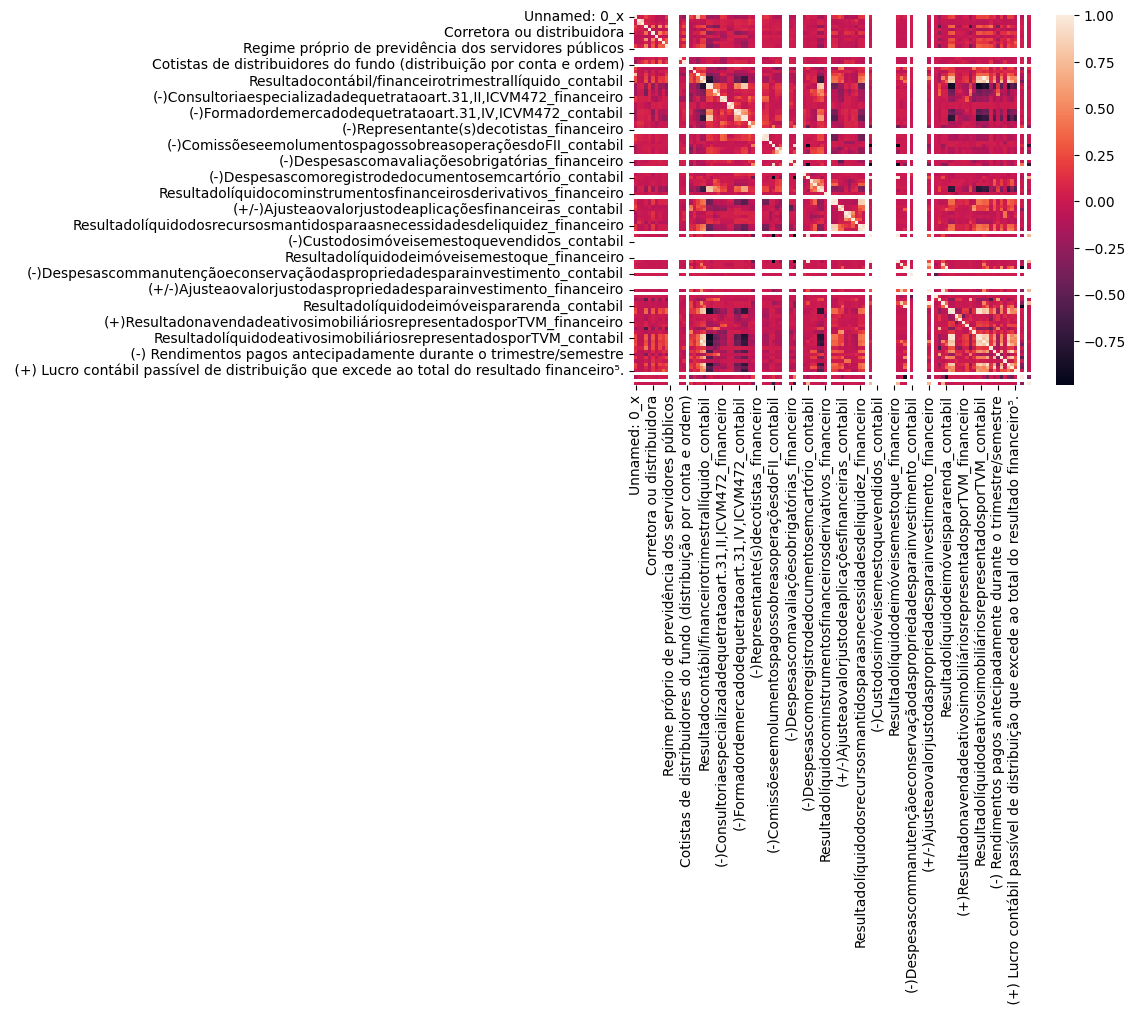

In [949]:
corr = final.corr('pearson')
sns.heatmap(data=corr)

Tentando ver as variaveis que mais interefem no label

In [950]:
corr['label'].describe()

count    86.000000
mean      0.027609
std       0.240991
min      -0.724720
25%      -0.017496
50%      -0.005124
75%       0.012241
max       1.000000
Name: label, dtype: float64

In [951]:
corr.loc[(corr['label'] < -0.3) | (corr['label'] > 0.3)]['label']

(-)Auditoriaindependente_contabil                                   -0.325540
(-)ComissõeseemolumentospagossobreasoperaçõesdoFII_contabil         -0.718565
(-)Despesascomavaliaçõesobrigatórias_contabil                       -0.724720
(-)Despesascomoregistrodedocumentosemcartório_contabil               0.728652
(+)Receitadevendadeimóveisemestoque_contabil                         0.732832
Resultadolíquidodeimóveisemestoque_contabil                          0.732832
(+/-)Ajusteaovalorjustodaspropriedadesparainvestimento_financeiro    0.731809
Resultadolíquidodeimóveispararenda_financeiro                        0.729828
label                                                                1.000000
Name: label, dtype: float64

In [952]:
interval = [final['label'].min(),final['label'].quantile(.33),final['label'].quantile(.66),final['label'].max()]
labels = ['low_risk','medium_risk','hight_risk']

In [953]:
final['label'] = pd.cut(final['label'],bins=interval,labels=labels)

### Discretizar os Dados

In [956]:
discretized = pd.DataFrame()
for colum in final.columns:
    print(colum)
    if colum != 'label':
        discretized[colum] = pd.qcut(final[colum],2)
# pd.qcut(final,5)
discretized['label'] = final['label']
discretized

Unnamed: 0_x
Número de cotistas
Pessoa física
Pessoa jurídica não financeira
Banco comercial


ValueError: Bin edges must be unique: Index([0.0, 0.0, 2.0], dtype='float64', name='Banco comercial').
You can drop duplicate edges by setting the 'duplicates' kwarg

# SVM

In [ ]:
x = final.drop(columns=['label'])
y = final['label']

x__train = 

In [ ]:
from sklearn.svm import SVC
SVC()

# RNA